In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from random import shuffle

In [ ]:
train_data = np.load('training_data.npy')

In [ ]:
df = pd.DataFrame(train_data)

In [ ]:
df.head()

In [ ]:
Counter(df[1].apply(str))

In [ ]:
lefts = []
rights = []
forwards = []

shuffle(train_data)

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0]:
        lefts.append([img,choice])
    elif choice == [0,1,0]:
        forwards.append([img,choice])
    elif choice == [0,0,1]:
        rights.append([img,choice])
    else:
        print('no matches')
        



In [ ]:
forwards = forwards[:len(lefts)][:len(rights)]
lefts = lefts[:len(forwards)]
rights = rights[:len(forwards)]

final_data = forwards + lefts + rights
shuffle(final_data)

np.save('training_data.npy', final_data)


In [2]:
balanced_data = np.load('training_data.npy')

df_new = pd.DataFrame(balanced_data)

In [3]:
Counter(df_new[1].apply(str))

Counter({'[0, 0, 1]': 4858, '[0, 1, 0]': 4858, '[1, 0, 0]': 4858})

In [4]:
df_new.describe

<bound method NDFrame.describe of                                                        0          1
0      [[64, 174, 174, 174, 174, 174, 174, 174, 174, ...  [0, 0, 1]
1      [[64, 180, 180, 180, 180, 180, 180, 180, 180, ...  [0, 0, 1]
2      [[64, 183, 183, 183, 183, 183, 183, 183, 183, ...  [0, 1, 0]
3      [[64, 71, 15, 12, 38, 15, 32, 21, 30, 76, 106,...  [0, 1, 0]
4      [[64, 44, 6, 8, 7, 6, 6, 1, 6, 12, 15, 10, 10,...  [1, 0, 0]
5      [[64, 4, 6, 7, 183, 183, 183, 183, 182, 183, 3...  [0, 1, 0]
6      [[64, 23, 23, 35, 23, 38, 17, 17, 34, 21, 24, ...  [0, 1, 0]
7      [[64, 170, 115, 129, 182, 182, 182, 182, 182, ...  [0, 1, 0]
8      [[64, 17, 14, 10, 32, 23, 38, 39, 39, 17, 12, ...  [0, 0, 1]
9      [[64, 120, 119, 115, 126, 61, 27, 19, 103, 103...  [0, 0, 1]
10     [[64, 191, 191, 191, 191, 191, 186, 53, 191, 1...  [1, 0, 0]
11     [[64, 25, 43, 39, 144, 142, 147, 130, 133, 142...  [0, 1, 0]
12     [[64, 25, 37, 25, 41, 52, 10, 73, 27, 33, 19, ...  [0, 1, 0]
13     [[64, 1

In [5]:
# Get ndArray of all column names 
df_new.columns.values

array([0, 1])

In [6]:
df_new[0].iloc[0].reshape(-1,160,120,1).shape

(1, 160, 120, 1)

left
frame : 11511


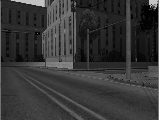

In [22]:
import numpy
import PIL
from PIL import Image
from matplotlib.pyplot import imshow
import random

random_frame = random.randint(1,14574)


image_arr = df_new[0].iloc[random_frame]
move = df_new[1].iloc[random_frame]

img = PIL.Image.fromarray(image_arr)


if move == [0,1,0]:
    print("foward")
elif move == [1,0,0]:
    print("left")
elif move == [0,0,1]:
    print("right")
    
    
print("frame : "+str(random_frame))


img



In [7]:
""" AlexNet.
References:
    - Alex Krizhevsky, Ilya Sutskever & Geoffrey E. Hinton. ImageNet
    Classification with Deep Convolutional Neural Networks. NIPS, 2012.
Links:
    - [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
"""

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization

def alexnet(width, height, lr):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 3, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path='model_alexnet',
                        max_checkpoints=1, tensorboard_verbose=0, tensorboard_dir='log')

    return model

Scipy not supported!
Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# creating model instance

WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 14
MODEL_NAME = 'pygtaSa-{}-{}-{}-epochs.model'.format(LR, 'alexnetv2',EPOCHS)

model = alexnet(WIDTH, HEIGHT, LR)

In [ ]:
train_data = np.load('training_data.npy')

train = train_data[:-500]
test = train_data[-500:]

#(-1,w,h,1) reshape because -1 means that the length in that dimension is inferred. 
# This is done based on the constraint that the number of elements in an
# ndarray or Tensor when reshaped must remain the same. In the tutorial,
# each image is a row vector (784 elements) and 
# there are lots of such rows (let it be n, so there are 784n elements).
# So, when you write

# x_image = tf.reshape(x, [-1, 28, 28, 1])

# TensorFlow can infer that -1 is n.

#ref : https://stackoverflow.com/questions/41848660/why-the-negative-reshape-1-in-mnist-tutorial/41848962



X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
test_y = [i[1] for i in test]


In [ ]:
model.fit({'input': X}, {'targets': Y}, n_epoch=EPOCHS, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

# tensorboard --logdir=foo:C:/Users/H/Desktop/ai-gaming/log

model.save(MODEL_NAME)

In [8]:
WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 15
MODEL_NAME = 'pygtaSa-{}-{}-{}-epochs.model'.format(LR, 'alexnetv2',EPOCHS)

model = alexnet(WIDTH, HEIGHT, LR)

model.load(MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


ValueError: The passed save_path is not a valid checkpoint: /tf/AI_GTA/pygtaSa-0.001-alexnetv2-15-epochs.model

In [29]:
# image_array = df_new[0].iloc[11511]
model